In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style("dark")
import numpy as np
import matplotlib

In [36]:
matplotlib.rcParams['figure.figsize'] = 10,10

In [44]:
gates = np.load('C:\Gatenet\gates.txt.npy')
print(gates.shape)

(3, 10, 11)


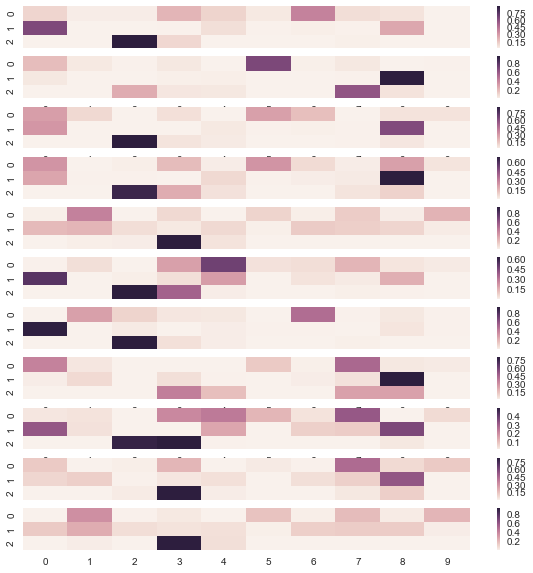

In [38]:
digits = 11
fig, axs = plt.subplots(nrows=digits)
for i in range(digits):
    sns.heatmap(gates[:,:,i], ax=axs[i])

In [39]:
gate_vectors = np.reshape(gates, (3*10,11))

In [40]:
gate_vectors = np.transpose(gate_vectors)

In [45]:
trial = 10
output = np.zeros(11)
for i in range(11):
    a = gate_vectors[trial][:]
    b = gate_vectors[i][:]
    an = a/np.linalg.norm(a)
    bn = b/np.linalg.norm(b)
    output[i] = np.dot(an,bn)

print(output)
elems = np.argsort(output)
print(np.flip(elems, axis=0))

[ 0.18816208  0.20665252  0.20118442  0.30191866  0.99158988  0.43447754
  0.19865404  0.48852447  0.63608953  0.80942489  1.        ]
[10  4  9  8  7  5  3  1  2  6  0]
